<a href="https://colab.research.google.com/github/LamaCian/Rain-prediction-in-Australia/blob/main/spojene_klase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### Ucitavanje neophodnih biblioteka i skupa podataka





In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn import svm
from sklearn import multiclass
from sklearn import metrics
from sklearn import preprocessing
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.feature_selection import RFECV

from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from mlxtend.data import mnist_data
from sklearn.metrics import accuracy_score


from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, KFold
from sklearn.metrics import recall_score, roc_auc_score
from sklearn import datasets
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics

import imblearn

In [ ]:
seed_value = 7
import tensorflow as tf
from tensorflow import keras
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import random
random.seed(seed_value)

np.random.seed(seed_value)

tf.random.set_seed(seed_value)

import tensorflow.keras.backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

In [2]:
data = pd.read_csv('dataset_5_arrhythmia.csv')
data

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


## Analiza skupa


In [3]:
categorical = [atribut for atribut in data.columns if data[atribut].dtype=='O']

print('Ukupno ima {} kategorickih atributa\n'.format(len(categorical)))

print('Kategoricki atributi :', categorical)

Ukupno ima 5 kategorickih atributa

Kategoricki atributi : ['T', 'P', 'QRST', 'J', 'heartrate']


In [4]:
data['class'].value_counts()

1     245
10     50
2      44
6      25
16     22
3      15
4      15
5      13
9       9
15      5
14      4
7       3
8       2
Name: class, dtype: int64

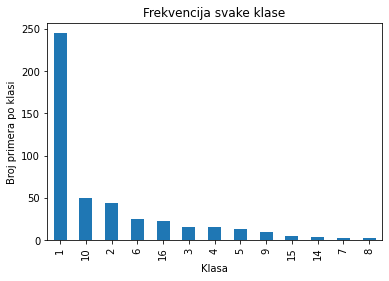

In [5]:
data['class'].value_counts().plot.bar()
plt.title('Frekvencija svake klase')
plt.ylabel('Broj primera po klasi')
plt.xlabel('Klasa')
plt.show()

In [ ]:
for cat_feature in categorical:
    print("Atribut ", cat_feature)
    print('\n')
    print(data[cat_feature])
    print('\n')

Atribut  T


0       13
1       37
2       34
3       11
4       13
      ... 
447      4
448     66
449    -19
450     29
451     79
Name: T, Length: 452, dtype: object


Atribut  P


0       64
1      -17
2       70
3       -5
4       61
      ... 
447     40
448     52
449    -61
450    -22
451     52
Name: P, Length: 452, dtype: object


Atribut  QRST


0       -2
1       31
2       66
3       20
4        3
      ... 
447    -27
448     79
449    -70
450     43
451     47
Name: QRST, Length: 452, dtype: object


Atribut  J


0        ?
1        ?
2       23
3        ?
4        ?
      ... 
447      ?
448      ?
449     84
450    103
451      ?
Name: J, Length: 452, dtype: object


Atribut  heartrate


0      63
1      53
2      75
3      71
4       ?
       ..
447    63
448    73
449    84
450    80
451    75
Name: heartrate, Length: 452, dtype: object




In [ ]:
#Nedostajuce vrednosti su obelezene sa ?

data.columns[data.isin(['?']).any()].tolist()

['T', 'P', 'QRST', 'J', 'heartrate']

In [ ]:
data[data.columns[data.isin(['?']).any()]].isin(['?']).sum()

T              8
P             22
QRST           1
J            376
heartrate      1
dtype: int64

In [6]:
data.replace("?", np.NaN, inplace = True)
data.drop(labels = "J", inplace = True, axis = 1)
categorical.remove('J')
data.dropna(inplace = True)


In [7]:
for feature in categorical:
  data[feature] = data[feature].astype(float)
  # data[feature].replace(np.NaN, data[feature].mean(), inplace=True)

In [8]:
corr_matrix = data.corr()
corr_matrix

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
age,1.000000,-0.052084,-0.114625,0.384907,-0.008290,0.092881,0.207891,0.035858,0.125412,-0.261817,...,0.163208,-0.156422,0.101104,0.080558,NaN,-0.033605,-0.287735,0.030226,-0.203056,-0.152051
sex,-0.052084,1.000000,-0.119554,-0.259638,-0.331481,-0.071463,0.089937,-0.189477,-0.106696,0.075697,...,0.227975,-0.029643,0.096843,0.007583,NaN,-0.013485,0.074326,0.052079,0.067768,-0.187006
height,-0.114625,-0.119554,1.000000,-0.081448,-0.008066,0.015614,-0.247231,-0.044775,0.036072,0.063063,...,-0.017588,-0.082453,-0.092785,0.004709,NaN,0.079236,-0.013971,-0.097576,-0.102903,0.009783
weight,0.384907,-0.259638,-0.081448,1.000000,0.102327,0.175529,0.163161,0.137939,0.192933,-0.196698,...,0.043963,-0.033690,0.052209,0.026665,NaN,-0.030127,-0.144449,0.060526,-0.055199,-0.111600
QRSduration,-0.008290,-0.331481,-0.008066,0.102327,1.000000,0.040899,0.235306,0.405743,0.083855,-0.156218,...,-0.183869,0.098882,-0.234574,-0.004211,NaN,-0.057753,-0.232773,0.135723,-0.084881,0.339867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chV6_PwaveAmp,-0.033605,-0.013485,0.079236,-0.030127,-0.057753,-0.058041,-0.077281,0.016267,0.111767,0.103969,...,-0.144945,0.019857,-0.076964,-0.014071,NaN,1.000000,-0.074564,-0.041019,-0.057660,-0.006975
chV6_TwaveAmp,-0.287735,0.074326,-0.013971,-0.144449,-0.232773,0.011729,-0.061624,-0.195705,-0.046530,0.078861,...,0.085145,0.123711,-0.063233,-0.008180,NaN,-0.074564,1.000000,-0.117577,0.687579,0.003784
chV6_QRSA,0.030226,0.052079,-0.097576,0.060526,0.135723,0.017935,0.277733,0.134561,0.028730,0.305022,...,0.031748,0.663613,0.567303,-0.039777,NaN,-0.041019,-0.117577,1.000000,0.616572,-0.004680
chV6_QRSTA,-0.203056,0.067768,-0.102903,-0.055199,-0.084881,0.022834,0.152183,-0.017996,0.001285,0.270560,...,0.081463,0.575467,0.353264,-0.035227,NaN,-0.057660,0.687579,0.616572,1.000000,0.005457


In [9]:
treshold = 0.85
target = 'class'
corr_matrix = corr_matrix.abs()

high_cor_features = set([tuple(sorted(x)) for x in np.argwhere(corr_matrix.values>=treshold) if x[0]!=x[1]])
high_corr = [(corr_matrix.columns[x[0]], corr_matrix.columns[x[1]]) for x in high_cor_features]
target_corr_dict = corr_matrix[target].to_dict()
cols_to_drop = [sorted(list(t), key=target_corr_dict.get)[::-1][0] for t in high_corr]

df = data.drop(cols_to_drop, axis=1)
df

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV5_PwaveAmp,chV5_QRSA,chV6_JJwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.9,25.5,-0.3,9.0,-0.9,0.0,0.0,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.4,21.6,-0.5,8.5,0.0,0.0,0.0,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.4,11.5,0.9,9.5,-2.4,0.0,0.0,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.6,36.8,0.1,12.2,-2.2,0.0,0.0,34.6,61.6,1
5,13,0,169,51,100,167,321,174,91,107,...,0.8,20.1,0.0,12.2,-2.8,0.0,0.0,13.5,31.1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.8,-8.4,0.0,4.3,-5.0,0.0,0.0,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.4,50.7,-0.5,15.6,-1.6,0.0,0.0,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,1.9,-39.6,1.2,16.3,-28.6,0.0,0.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,0.4,29.7,0.2,12.0,-0.7,0.0,0.0,25.0,46.6,1


In [10]:
new_data = df.drop(df.columns[df.apply(lambda col: (col.isin([0]).sum() )> 0.95 * (len(col)))], axis=1)
new_data

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV5_QwaveAmp,chV5_SwaveAmp,chV5_PwaveAmp,chV5_QRSA,chV6_JJwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,-4.0,0.9,25.5,-0.3,9.0,-0.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,-2.4,0.4,21.6,-0.5,8.5,0.0,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,-3.4,0.4,11.5,0.9,9.5,-2.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,-3.7,0.6,36.8,0.1,12.2,-2.2,34.6,61.6,1
5,13,0,169,51,100,167,321,174,91,107,...,0.0,-11.4,0.8,20.1,0.0,12.2,-2.8,13.5,31.1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,-8.3,0.8,-8.4,0.0,4.3,-5.0,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,-2.8,0.4,50.7,-0.5,15.6,-1.6,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,-30.8,1.9,-39.6,1.2,16.3,-28.6,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,0.0,-3.5,0.4,29.7,0.2,12.0,-0.7,25.0,46.6,1


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.3 MB/s 


## Spajanje

In [11]:
values = [7,8,14,15,16,6,2,10,9,3,4,5]
for value in values:
  new_data['class'].mask(new_data['class'] == value, 0 , inplace=True)

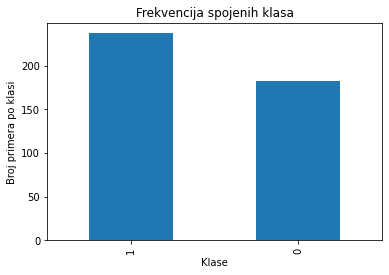

In [12]:
new_data['class'].value_counts().plot.bar()
plt.title('Frekvencija spojenih klasa')
plt.xlabel('Klase')
plt.ylabel('Broj primera po klasi')
plt.show()

In [13]:
x = new_data.drop(labels = 'class', axis = 1)
y = new_data['class']
# x = x[~np.isnan(x)]


In [14]:
x_train_validation, x_test, y_train_validation, y_test = model_selection.train_test_split(x,y, test_size=0.2, stratify=y, random_state=7)
x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x_train_validation, y_train_validation, stratify=y_train_validation, random_state=7, test_size=0.2)

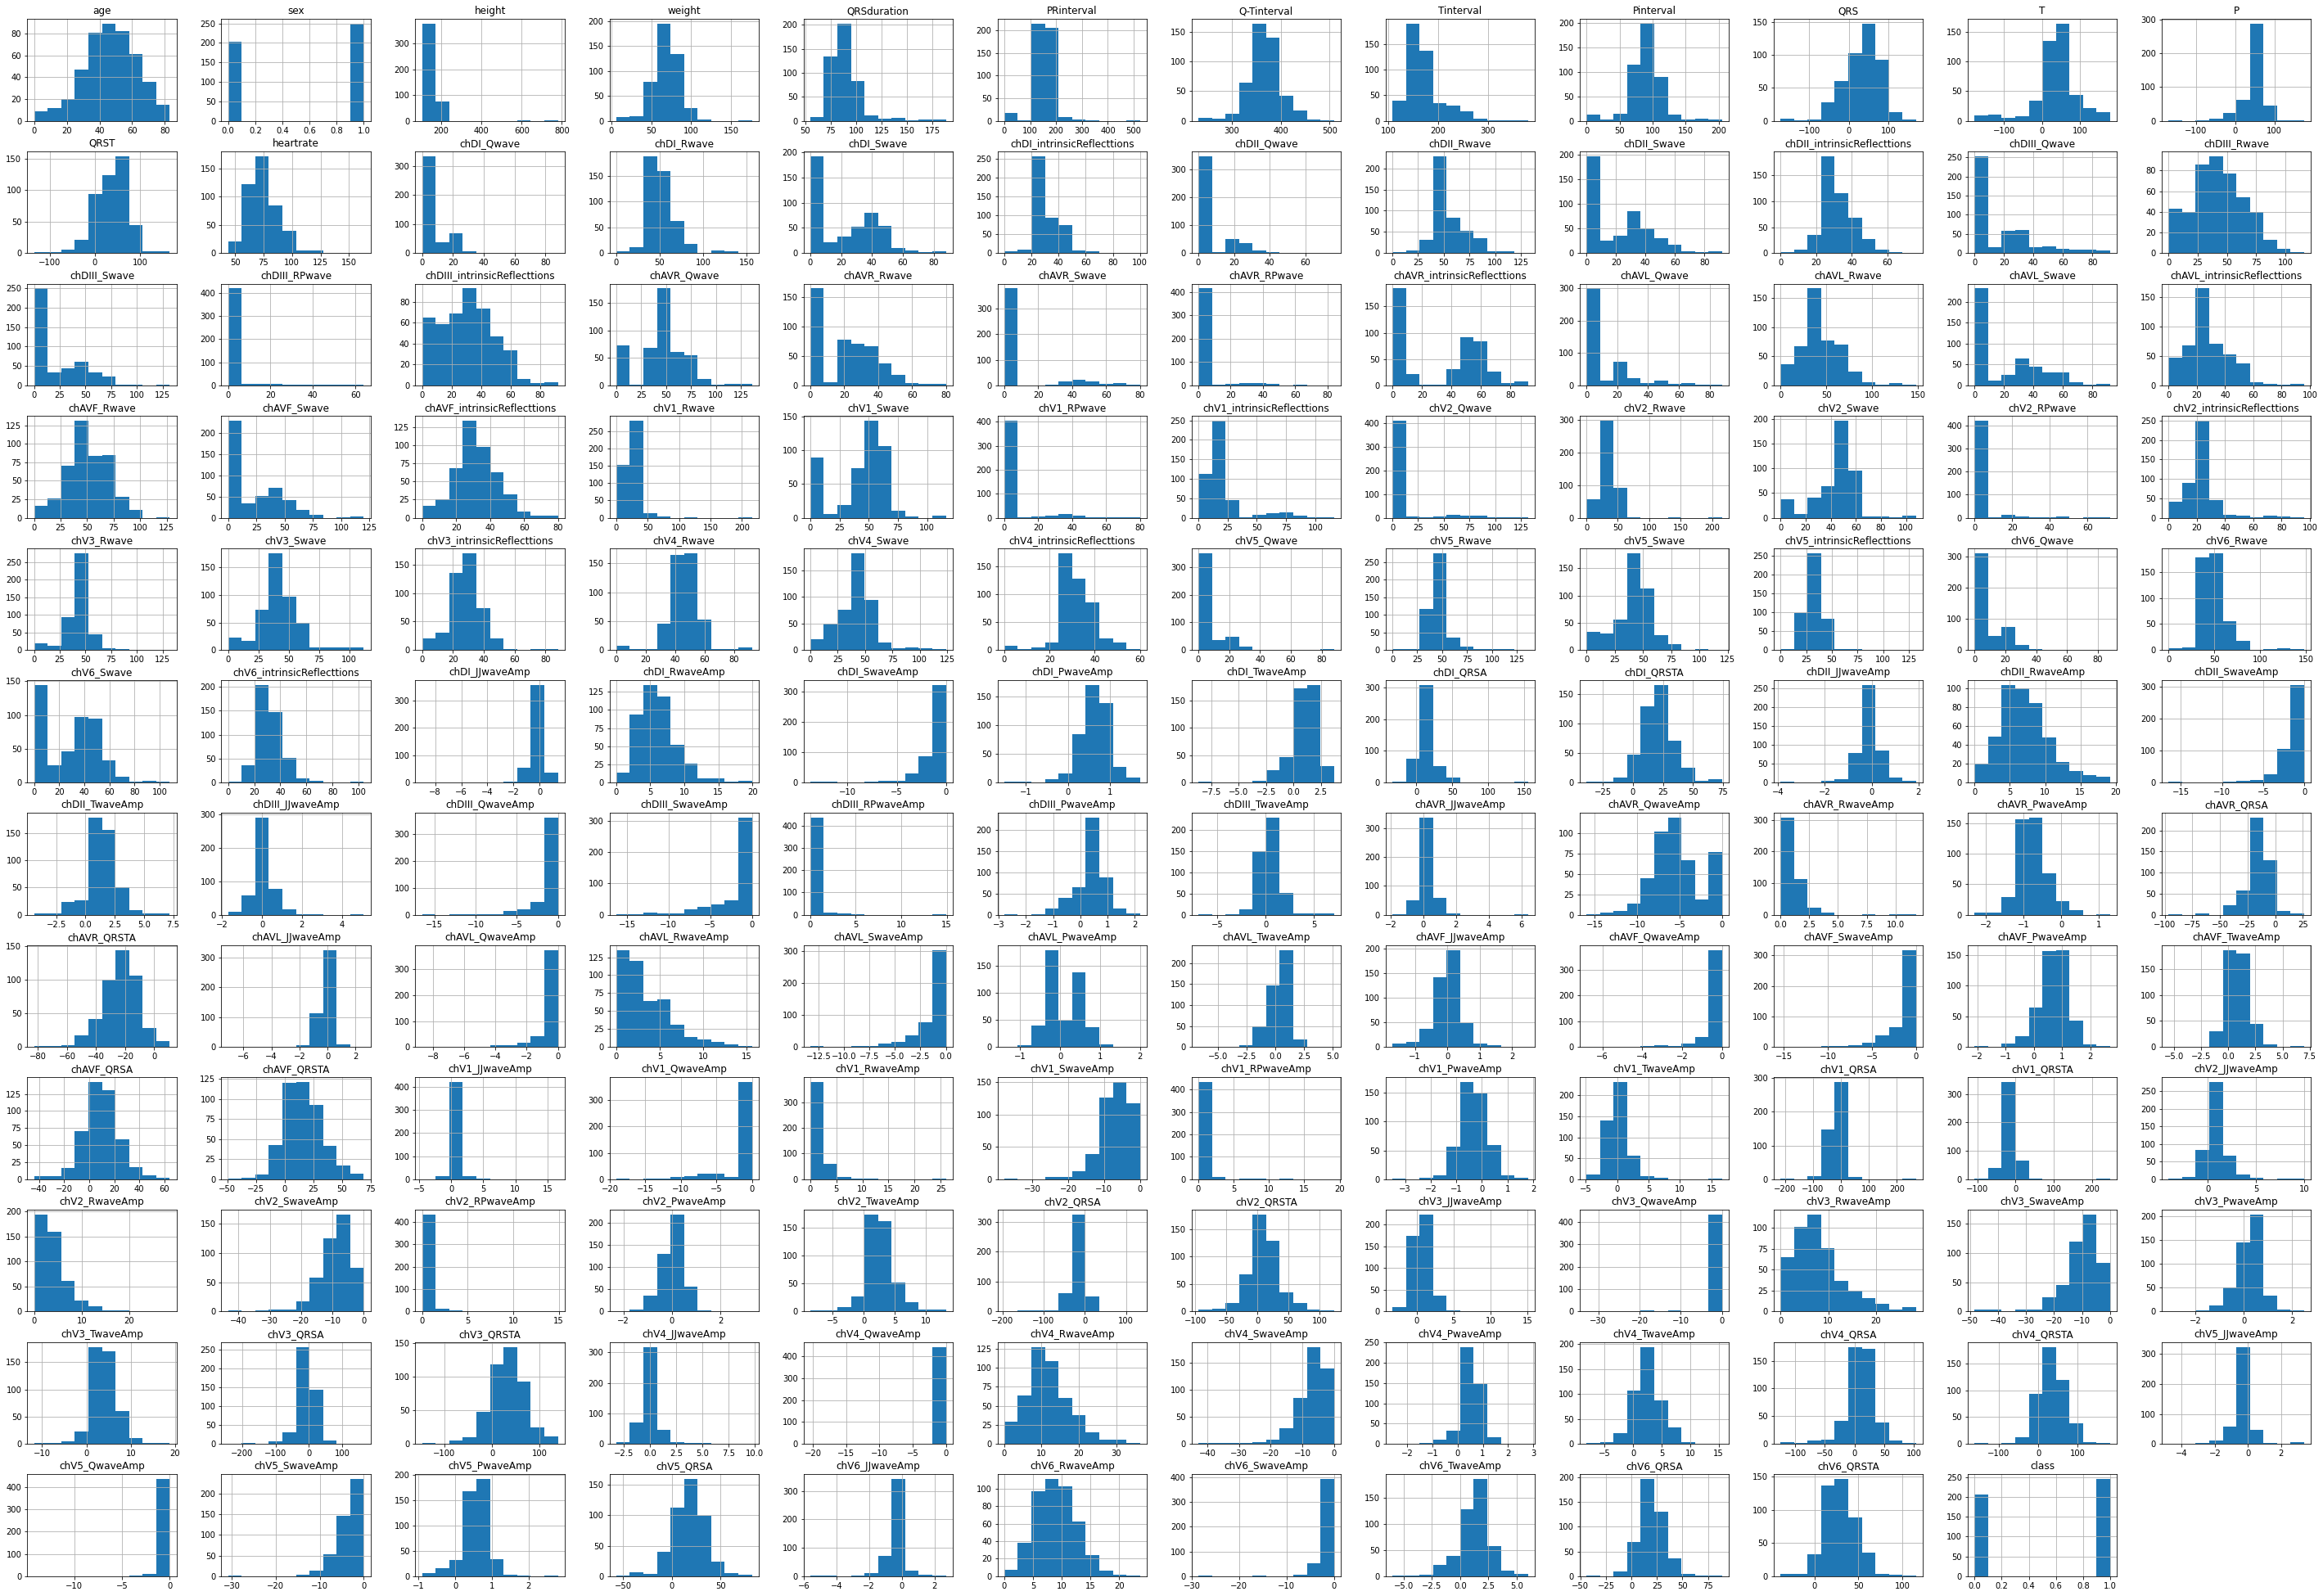

In [ ]:
new_data.hist(figsize=(50,35))
plt.show()

In [ ]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.7 MB 368 kB/s 


In [15]:
for feature in categorical:

  x_train[feature].fillna(x_train[feature].mean(), inplace = True)

In [16]:
def calculate_metrics(model, y_train, y_test, grid):

  print('Izracunate metrike: ')
  print('\n')

  y_pred_train = model.predict(x_train)
  y_pred_test = model.predict(x_test)


  train_f1= f1_score(y_train, y_pred_train, average = 'macro')
  test_f1= f1_score(y_test, y_pred_test,average = 'macro')
  train_recall  = recall_score(y_train, y_pred_train, average = 'macro')
  test_recall = recall_score(y_test, y_pred_test, average = 'macro')
  train_precision  = precision_score(y_train, y_pred_train, average = 'macro')
  test_precision = precision_score(y_test, y_pred_test, average = 'macro')

  print('F1 %.2f%% (average over k-fold CV test folds)' %
      (100 * grid.best_score_))
  print('Best Parameters: %s' % grid.best_params_)
  print(100 * '-')
  print('Macro: ')

  print('Training F1: %.2f%%' % (100 * train_f1))
  print('Test F1: %.2f%%' % (100 * test_f1))
  print('\n')

  print('Training recall score: %.2f%%' % (100 * train_recall))
  print('Test recall score: %.2f%%' % (100 * test_recall))
  print('\n')

  print('Training precision score: %.2f%%' % (100 * train_precision))
  print('Test precision score: %.2f%%' % (100 * test_precision))

  print(100 * '-')
  print('\n')
  print('Weighted: ')
  train_f1_weighted= f1_score(y_train, y_pred_train, average = 'weighted')
  test_f1_weighted= f1_score(y_test, y_pred_test,average = 'weighted')
  print('Training F1: %.2f%%' % (100 * train_f1_weighted))
  print('Test F1: %.2f%%' % (100 * test_f1_weighted))
  train_recall_weighted  = recall_score(y_train,y_pred_train, average = 'weighted')
  test_recall_weighted  = recall_score(y_test, y_pred_test, average = 'weighted')
  print('Training recall score: %.2f%%' % (100 * train_recall_weighted))
  print('Test recall score: %.2f%%' % (100 * test_recall_weighted))
  print('\n')
  train_precision_weighted   = precision_score(y_train, y_pred_train, average = 'weighted')
  test_precision_weighted  = precision_score(y_test, y_pred_test, average = 'weighted')
  print('Training precision score: %.2f%%' % (100 * train_precision_weighted ))
  print('Test precision score: %.2f%%' % (100 * test_precision_weighted ))

  print(100 * '-')

  cnf_matrix = confusion_matrix(y_test, y_pred_test)
  print('\n')
  print('Matrica konfuzije test: ')
  print('\n')
  print(pd.DataFrame(cnf_matrix,index=model.classes_, columns=model.classes_))
  print(100 * '-')
  print('\n')


  cnf_matrix = confusion_matrix(y_train, y_pred_train)
  print('\n')
  print('Matrica konfuzije trening: ')
  print('\n')
  print(pd.DataFrame(cnf_matrix,index=model.classes_, columns=model.classes_))
  print(100 * '-')
  print('\n')

  FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
  FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
  TP = np.diag(cnf_matrix)
  TN = cnf_matrix.sum() - (FP + FN + TP)

  FP = FP.astype(float)
  FN = FN.astype(float)
  TP = TP.astype(float)
  TN = TN.astype(float)

  # Sensitivity, hit rate, recall, or true positive rate
  TPR = TP/(TP+FN)
  print('Sensitivity ', TPR)
  # Specificity or true negative rate
  TNR = TN/(TN+FP) 
  print('Specificity : ', TNR)
  print('\n')
  print(100 * '-')

  print('\n')
  print("Izvestaj klasifikacije Trening")
  print(metrics.classification_report(y_train, y_pred_train))
  print('\n')
  print("Izvestaj klasifikacije Test")
  print(metrics.classification_report(y_test, y_pred_test))

  f1_scores = [train_f1, test_f1,train_f1_weighted, test_f1_weighted]
  f1_labels = ['macro F1 train', 'macro F1 test', 'weighted F1 train','weighted F1 test']

  sns.barplot(x =f1_labels, y = f1_scores)
  plt.title('F1 score')
  plt.ylabel('score')
  plt.xticks(rotation='vertical')
  plt.show()

  recall_scores = [train_recall, test_recall,train_recall_weighted, test_f1_weighted]
  recall_labels = ['macro recall train', 'macro recall test', 'weighted recall train','weighted recall test',]


  sns.barplot(x =recall_labels, y = recall_scores)
  plt.title('Recall score')
  plt.ylabel('score')
  plt.xticks(rotation='vertical')
  plt.show()

  precision_scores = [train_precision, test_precision,train_precision_weighted, test_precision_weighted]
  precision_labels = ['macro precision train', 'macro precision test', 'weighted precision train','weighted precision test',]


  sns.barplot(x = precision_labels, y = precision_scores)
  plt.title('Precision score')
  plt.ylabel('score')
  plt.xticks(rotation='vertical')
  plt.show()

  return train_f1, test_f1, train_recall, test_recall, train_precision, test_precision, train_f1_weighted, test_f1_weighted, train_recall_weighted,test_recall_weighted, train_precision, test_precision, TNR



In [17]:
def nested_cross_val(param, pipe, alg):


  inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
  outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

  # for param_grid, estimator, algorithm in zip(param, pipe, alg):
  grid = GridSearchCV(estimator = pipe, param_grid=param, scoring = 'f1_weighted', cv = inner_cv, refit = True)

  scores_dict = cross_validate(pipe, x_train_validation, y_train_validation, cv = outer_cv, return_estimator=True)
              
  print(50 * '-', '\n')
  print('Algorithm:', alg)

  print('\n%s - Prosecno %.2f%% +/- %.2f' % 
        (alg, scores_dict['test_score'].mean() * 100, 
          scores_dict['test_score'].std() * 100))
  mean = scores_dict['test_score'].mean()

  return mean

In [18]:
def compare_metrics(score1, score2, score3, score4,name1,name2,name3,name4):
  x = [score1, score2, score3, score4]
  y = [name1,name2,name3,name4]

  sns.barplot(x , y)
  plt.title('Uporedjivanje razlicitih tehnika')
  plt.xlabel('score')
  plt.show()


## Logisticka regresija

In [ ]:
x_train_validation.dropna()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV5_QwaveAmp,chV5_SwaveAmp,chV5_PwaveAmp,chV5_QRSA,chV6_JJwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA
16,47,0,171,59,82,145,347,169,61,77,...,0.0,-2.6,0.4,25.3,-0.4,9.4,-1.7,2.3,19.5,41.1
142,49,0,166,73,95,157,383,163,92,-18,...,0.0,-2.9,0.5,10.1,-0.1,5.6,-0.5,1.7,11.1,25.3
438,37,0,175,82,88,146,357,179,72,1,...,0.0,-3.3,0.6,33.4,-0.4,13.5,-1.2,0.6,30.1,35.0
179,56,1,162,64,79,172,266,198,93,-2,...,0.0,-3.0,0.3,12.9,-0.6,6.8,-1.3,-0.6,13.7,6.3
378,67,1,160,68,87,158,386,152,115,58,...,0.0,-2.0,0.9,19.1,-0.5,9.1,-1.6,2.0,20.8,36.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,50,1,160,106,85,151,383,163,64,22,...,0.0,-3.7,0.4,5.7,0.0,5.9,-2.0,2.2,8.1,27.9
41,40,1,160,75,79,154,350,160,94,67,...,0.0,-3.4,0.4,2.5,-0.3,6.1,-1.3,0.9,8.1,16.2
119,58,1,170,75,90,157,382,168,114,52,...,0.0,-3.2,0.7,21.6,-0.6,10.9,-1.8,1.2,22.2,31.0
451,78,1,160,70,79,127,364,138,78,28,...,0.0,-2.9,0.6,26.7,-0.3,10.4,-1.8,1.6,21.3,32.8


In [ ]:
model = LogisticRegression(multi_class='multinomial', max_iter = 4000)
pipe_log_simple = Pipeline([('std', StandardScaler()),('clf1', model)])
param_grid1 = [{'clf1__penalty': ['l2'],
                'clf1__C': np.power(10., np.arange(-4, 4)),
                'clf1__solver': ['saga', 'newton-cg']}]

grid = GridSearchCV(estimator = pipe_log_simple, param_grid = param_grid1, scoring = 'f1_weighted', cv = 5)
grid.fit(x_train_validation, y_train_validation)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('std', StandardScaler()),
                                       ('clf1',
                                        LogisticRegression(max_iter=4000,
                                                           multi_class='multinomial'))]),
             param_grid=[{'clf1__C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'clf1__penalty': ['l2'],
                          'clf1__solver': ['saga', 'newton-cg']}],
             scoring='f1_weighted')

In [ ]:
feature_names = x_train_validation.columns

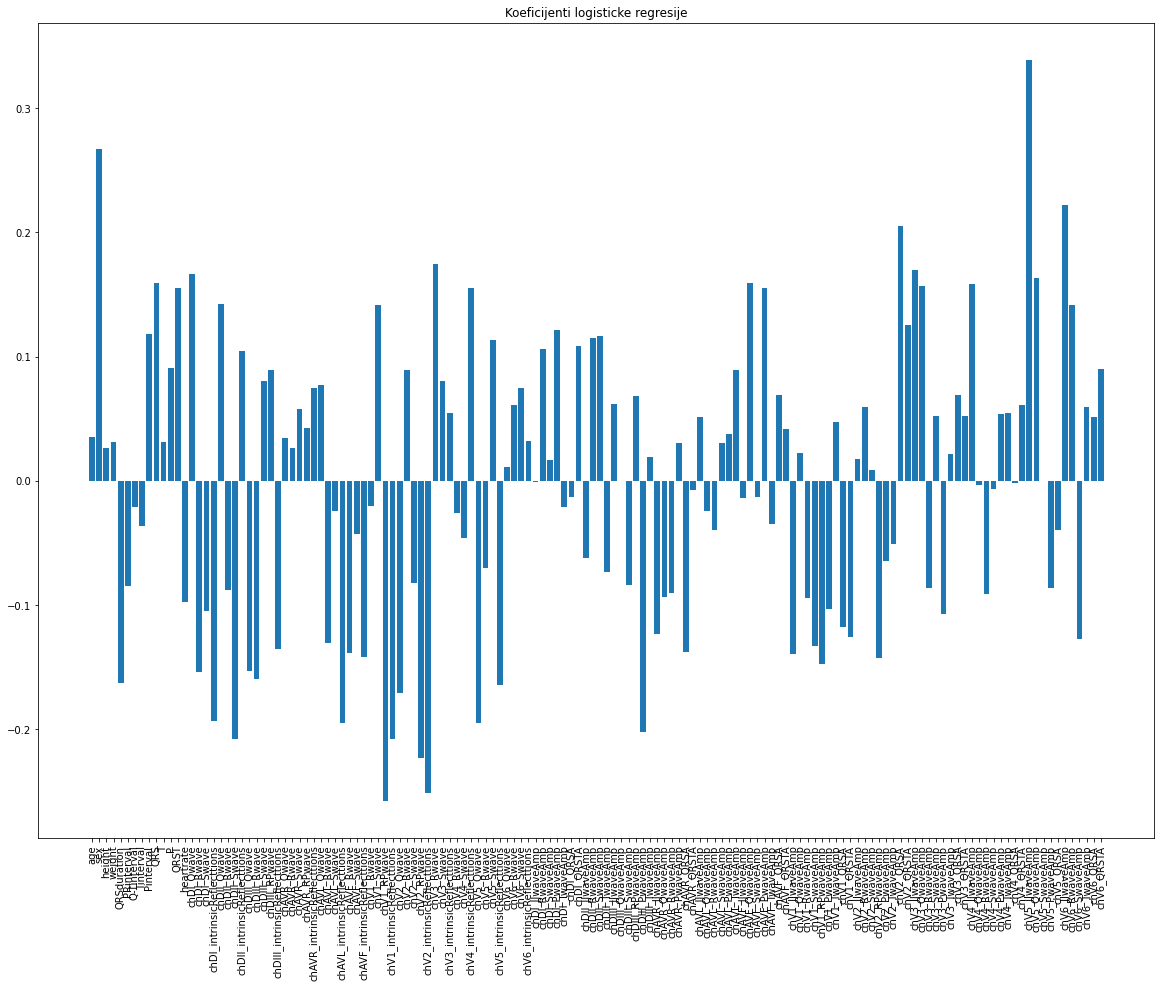

In [ ]:
classifier = grid.best_estimator_.named_steps['clf1']

plt.figure(figsize=(20, 15))
plt.bar(feature_names, classifier.coef_[0])
plt.xticks(np.arange(len(feature_names)), rotation='vertical')
plt.title('Koeficijenti logisticke regresije')
plt.show()

Izracunate metrike: 


F1 64.89% (average over k-fold CV test folds)
Best Parameters: {'clf1__C': 0.1, 'clf1__penalty': 'l2', 'clf1__solver': 'saga'}
----------------------------------------------------------------------------------------------------
Macro: 
Training F1: 79.81%
Test F1: 49.24%


Training recall score: 74.97%
Test recall score: 49.49%


Training precision score: 90.36%
Test precision score: 57.44%
----------------------------------------------------------------------------------------------------


Weighted: 
Training F1: 81.11%
Test F1: 62.91%
Training recall score: 82.64%
Test recall score: 65.93%


Training precision score: 83.58%
Test precision score: 63.12%
----------------------------------------------------------------------------------------------------


Matrica konfuzije test: 


    1   2   3   4   5   6   9   10  16
1   43   2   0   0   0   1   0   1   2
2    5   3   0   0   0   0   0   1   0
3    0   0   3   0   0   0   0   0   0
4    0   1   0   2   0   0 

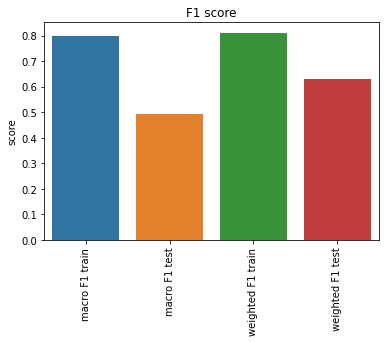

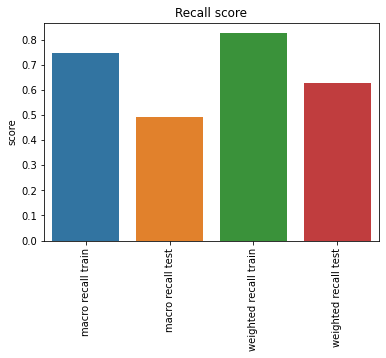

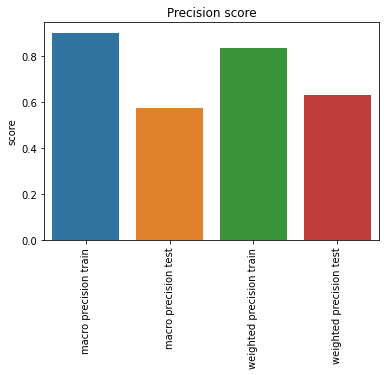

In [ ]:
# Select from model
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
model = LogisticRegression(multi_class='multinomial', max_iter = 4000)
pipe_log_sfm = Pipeline([('std', StandardScaler()),('feature_selector',SelectFromModel(LinearSVC(penalty="l2",dual=False))),('clf1', model)])
param_grid1 = [{'clf1__penalty': ['l2'],
                'clf1__C': np.power(10., np.arange(-4, 4)),
                'clf1__solver': ['saga', 'newton-cg']}]

grid_log_sfm = GridSearchCV(estimator = pipe_log_sfm, param_grid = param_grid1, scoring = 'f1_weighted', cv = 5)
grid_log_sfm.fit(x_train_validation, y_train_validation)

best_model_sfm = grid_log_sfm.best_estimator_

train_f1_log_sfm, test_f1_log_sfm, train_recall_log_sfm, test_recall_log_sfm, train_precision_log_sfm, test_precision_log_sfm, train_f1_weighted_log_sfm, test_f1_weighted_log_sfm, train_recall_weighted_log_sfm, test_recall_weighted_log_sfm, train_precision_log_sfm, test_precision_log_sfm, specifity_log_sfm= calculate_metrics(best_model_sfm, y_train, y_test, grid_log_sfm)

# train_f1_sfm = f1_score(y_true=y_train, y_pred=best_model_sfm.predict(x_train), average = 'macro')
# test_f1_sfm = f1_score(y_true=y_test, y_pred=best_model_sfm.predict(x_test),average = 'macro')

# print('Accuracy %.2f%% (average over k-fold CV test folds)' %
#       (100 * grid_sfm.best_score_))
# print('Best Parameters: %s' % grid_sfm.best_params_)

# print('Training Accuracy: %.2f%%' % (100 * train_f1_sfm))
# print('Test Accuracy: %.2f%%' % (100 * test_f1_sfm))


Izracunate metrike: 


F1 63.05% (average over k-fold CV test folds)
Best Parameters: {'clf1__C': 1.0, 'clf1__penalty': 'l2', 'clf1__solver': 'saga'}
----------------------------------------------------------------------------------------------------
Macro: 
Training F1: 78.68%
Test F1: 56.27%


Training recall score: 75.59%
Test recall score: 57.92%


Training precision score: 90.17%
Test precision score: 61.77%
----------------------------------------------------------------------------------------------------


Weighted: 
Training F1: 78.47%
Test F1: 67.85%
Training recall score: 80.90%
Test recall score: 72.53%


Training precision score: 82.55%
Test precision score: 69.30%
----------------------------------------------------------------------------------------------------


Matrica konfuzije test: 


    1   2   3   4   5   6   9   10  16
1   48   0   0   1   0   0   0   0   0
2    5   3   0   0   0   0   0   1   0
3    0   0   3   0   0   0   0   0   0
4    2   0   0   1   0   0 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetr

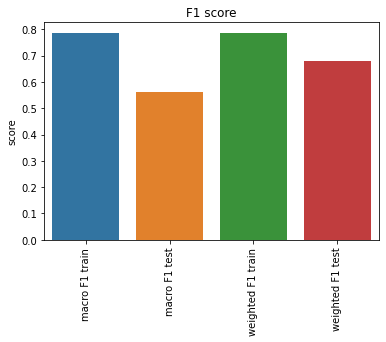

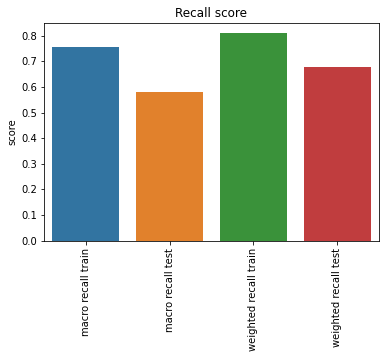

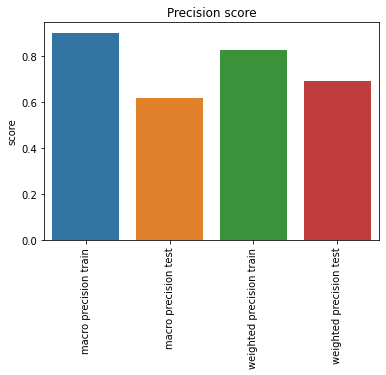

In [ ]:
# RFECV
pipe_log_rfecv = Pipeline([('std', StandardScaler()),('feature_selector',RFECV(estimator = SVC(kernel = 'linear'),step =1, cv =5)),('clf1', model)])
grid_log_rfecv = GridSearchCV(estimator = pipe_log_rfecv, param_grid = param_grid1, scoring = 'f1_weighted', cv = 5)
grid_log_rfecv.fit(x_train_validation, y_train_validation)
best_model_log_rfecv = grid_log_rfecv.best_estimator_

train_f1_log_rfecv, test_f1_log_rfecv, train_recall_log_rfecv, test_recall_log_rfecv, train_precision_log_rfecv, test_precision_log_rfecv, train_f1_weighted_log_rfecv, test_f1_weighted_log_rfecv, train_recall_weighted_log_rfecv, test_recall_weighted_log_rfecv, train_precision_log_rfecv, test_precision_log_rfecv, specifity_log_rfecv= calculate_metrics(best_model_log_rfecv, y_train, y_test, grid_log_rfecv)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Izracunate metrike: 


F1 66.99% (average over k-fold CV test folds)
Best Parameters: {'clf1__C': 1.0, 'clf1__penalty': 'l2', 'clf1__solver': 'saga'}
----------------------------------------------------------------------------------------------------
Macro: 
Training F1: 86.48%
Test F1: 58.83%


Training recall score: 84.71%
Test recall score: 60.58%


Training precision score: 91.14%
Test precision score: 62.55%
----------------------------------------------------------------------------------------------------


Weighted: 
Training F1: 85.24%
Test F1: 68.18%
Training recall score: 86.46%
Test recall score: 70.33%


Training precision score: 86.26%
Test precision score: 68.30%
----------------------------------------------------------------------------------------------------


Matrica konfuzije test: 


    1   2   3   4   5   6   9   10  16
1   43   1   0   1   1   0   0   2   1
2    5   2   0   0   0   1   0   1   0
3    0   0   3   0   0   0   0   0   0
4    0   1   0   2   0   0 

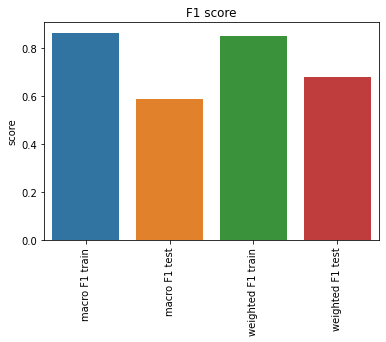

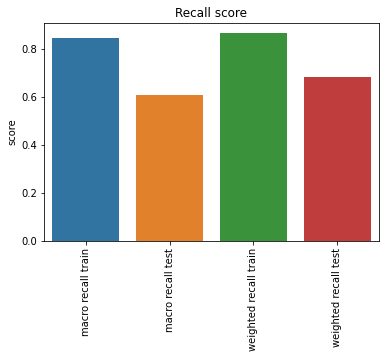

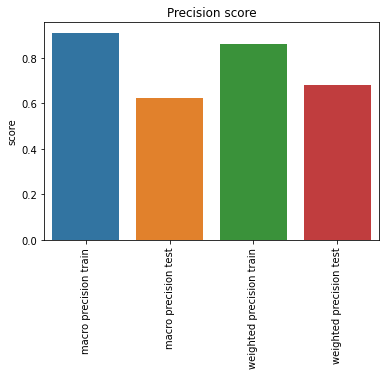

In [ ]:
# Select from model tree based algorithm



pipe_log_sfm_tree = Pipeline([('std', StandardScaler()),('feature_selector',SelectFromModel(RandomForestClassifier(max_depth= 12, n_estimators= 50))),('clf1', model)])
param_grid1 = [{'clf1__penalty': ['l2'],
                'clf1__C': np.power(10., np.arange(-4, 4)),
                'clf1__solver': ['saga', 'sag','newton-cg']}]

grid_sfm_tree = GridSearchCV(estimator = pipe_log_sfm_tree, param_grid = param_grid1, scoring = 'f1_weighted', cv = 5)
grid_sfm_tree.fit(x_train_validation, y_train_validation)

best_model_sfm_tree = grid_sfm_tree.best_estimator_
train_f1_log_sfm_tree, test_f1_log_sfm_tree, train_recall_log_sfm_tree, test_recall_log_sfm_tree, train_precision_log_sfm_tree, test_precision_log_sfm_tree, train_f1_weighted_log_sfm_tree, test_f1_weighted_log_sfm_tree, train_recall_weighted_log_sfm_tree, test_recall_weighted_log_sfm_tree, train_precision_log_sfm_tree, test_precision_log_sfm_tree, specifity_log_sfm_tree= calculate_metrics(best_model_sfm_tree, y_train, y_test, grid_sfm_tree)




Izracunate metrike: 


F1 60.36% (average over k-fold CV test folds)
Best Parameters: {'clf1__C': 1000.0, 'clf1__penalty': 'l2', 'clf1__solver': 'newton-cg'}
----------------------------------------------------------------------------------------------------
Macro: 
Training F1: 83.57%
Test F1: 49.96%


Training recall score: 87.47%
Test recall score: 53.76%


Training precision score: 81.89%
Test precision score: 51.38%
----------------------------------------------------------------------------------------------------


Weighted: 
Training F1: 75.93%
Test F1: 55.95%
Training recall score: 74.31%
Test recall score: 52.75%


Training precision score: 81.39%
Test precision score: 62.91%
----------------------------------------------------------------------------------------------------


Matrica konfuzije test: 


    1   2   3   4   5   6   9   10  16
1   27   4   0   1   1   1   0   3  12
2    2   4   0   1   0   0   0   1   1
3    0   0   3   0   0   0   0   0   0
4    0   2   0   1 

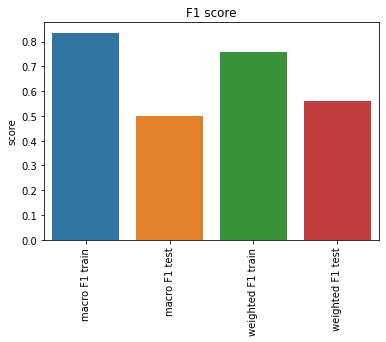

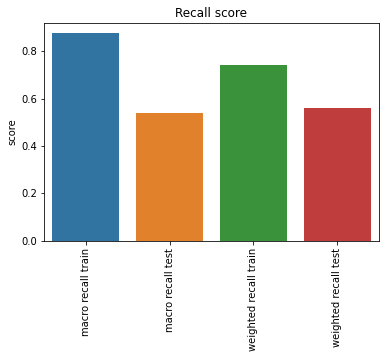

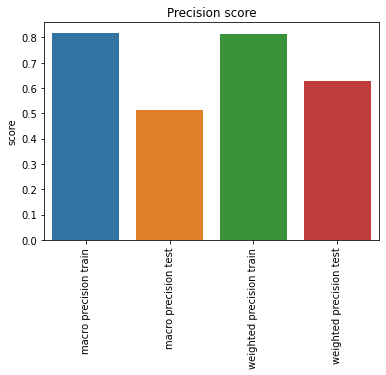

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline

pipe_log_smote = Pipeline([('std', StandardScaler()),('feature_selector',RFECV(estimator = SVC(kernel = 'linear'),step =1, cv =5)),('Oversampling',SMOTE(k_neighbors=4)),('clf1', model)])
grid_log_smote = GridSearchCV(estimator = pipe_log_smote, param_grid = param_grid1, scoring = 'f1_weighted', cv = 5)
grid_log_smote.fit(x_train_validation, y_train_validation)

best_model_log_smote = grid_log_smote.best_estimator_

train_f1_log_smote, test_f1_log_smote, train_recall_log_smote, test_recall_log_smote, train_precision_log_smote, test_precision_log_smote, train_f1_weighted_log_smote, test_f1_weighted_log_smote, train_recall_weighted_log_smote, test_recall_weighted_log_smote, train_precision_log_smote, test_precision_log_sfm_smote, specifity_log_smote= calculate_metrics(best_model_log_smote, y_train, y_test, grid_log_smote)


## KNN

Izracunate metrike: 


F1 55.59% (average over k-fold CV test folds)
Best Parameters: {'knn__n_neighbors': 3, 'knn__p': 2, 'knn__weights': 'distance'}
----------------------------------------------------------------------------------------------------
Macro: 
Training F1: 100.00%
Test F1: 50.50%


Training recall score: 100.00%
Test recall score: 50.37%


Training precision score: 100.00%
Test precision score: 58.69%
----------------------------------------------------------------------------------------------------


Weighted: 
Training F1: 100.00%
Test F1: 54.21%
Training recall score: 100.00%
Test recall score: 60.44%


Training precision score: 100.00%
Test precision score: 54.76%
----------------------------------------------------------------------------------------------------


Matrica konfuzije test: 


    1   2   3   4   5   6   9   10  16
1   43   1   0   0   0   5   0   0   0
2    6   2   0   0   0   0   0   0   1
3    0   0   3   0   0   0   0   0   0
4    0   0   0   3  

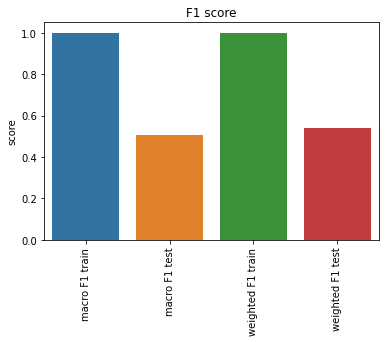

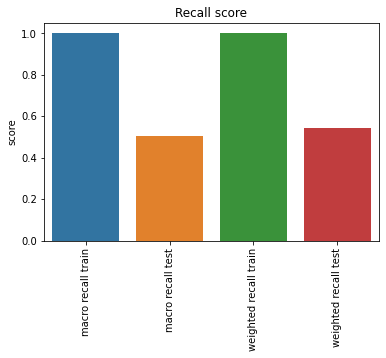

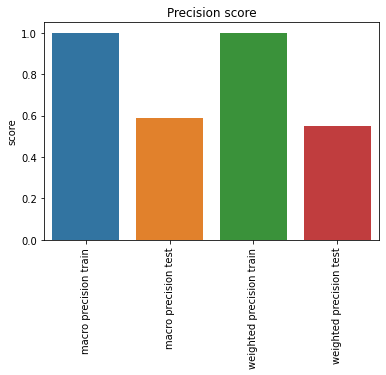

In [ ]:
model_knn = KNeighborsClassifier()
param_grid2 = [{'knn__n_neighbors': list(range(2, 5)),
                'knn__p': [1, 2],
                'knn__weights' : ['uniform', 'distance'],
                }]
pipe_knn_simple = Pipeline([('std', StandardScaler()),('knn', model_knn)])
grid_knn = GridSearchCV(estimator = pipe_knn_simple, param_grid = param_grid2, scoring = 'f1_weighted', cv = 5)
grid_knn.fit(x_train_validation, y_train_validation)


best_model_knn = grid_knn.best_estimator_

train_f1_knn, test_f1_knn, train_recall_knn, test_recall_knn, train_precision_knn, test_precision_knn, train_f1_weighted_knn, test_f1_weighted_knn, train_recall_weighted_knn, test_recall_weighted_knn, train_precision_knn, test_precision_knn, specifity_knn= calculate_metrics(best_model_knn, y_train, y_test, grid_knn)


Izracunate metrike: 


F1 54.93% (average over k-fold CV test folds)
Best Parameters: {'knn__n_neighbors': 4, 'knn__p': 2, 'knn__weights': 'distance'}
----------------------------------------------------------------------------------------------------
Macro: 
Training F1: 100.00%
Test F1: 52.33%


Training recall score: 100.00%
Test recall score: 50.93%


Training precision score: 100.00%
Test precision score: 61.06%
----------------------------------------------------------------------------------------------------


Weighted: 
Training F1: 100.00%
Test F1: 59.77%
Training recall score: 100.00%
Test recall score: 64.84%


Training precision score: 100.00%
Test precision score: 62.92%
----------------------------------------------------------------------------------------------------


Matrica konfuzije test: 


    1   2   3   4   5   6   9   10  16
1   45   1   0   0   0   2   0   0   1
2    6   2   0   0   1   0   0   0   0
3    1   0   2   0   0   0   0   0   0
4    0   0   0   3  

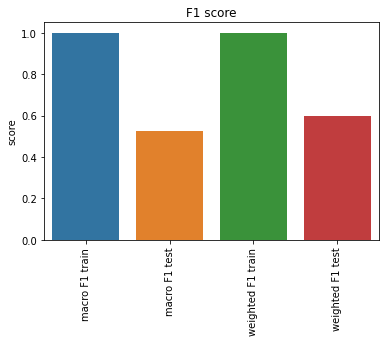

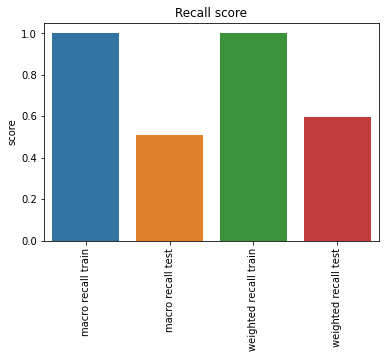

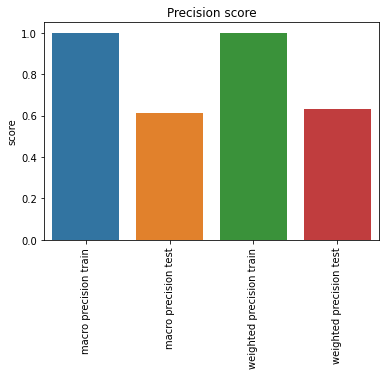

In [ ]:
# Select from model

pipe_knn_sfm = Pipeline([('std', StandardScaler()),('feature_selector',SelectFromModel(LinearSVC(penalty="l2",dual=False))),('knn', model_knn)])


grid_sfm_knn = GridSearchCV(estimator = pipe_knn_sfm, param_grid = param_grid2, scoring = 'f1_weighted', cv = 5)
grid_sfm_knn.fit(x_train_validation, y_train_validation)

best_model_sfm_knn = grid_sfm_knn.best_estimator_

train_f1_knn, test_f1_knn, train_recall_knn, test_recall_knn, train_precision_knn, test_precision_knn, train_f1_weighted_knn, test_f1_weighted_knn, train_recall_weighted_knn, test_recall_weighted_knn, train_precision_knn, test_precision_knn, specifity_knn = calculate_metrics(best_model_sfm_knn, y_train, y_test, grid_sfm_knn)


In [ ]:
# RFECV
pipe_knn_rfecv = Pipeline([('std', StandardScaler()),('feature_selector',RFECV(estimator = SVC(kernel = 'linear'),step =1, cv =5)),('knn', model_knn)])
grid_rfecv_knn = GridSearchCV(estimator = pipe_knn_rfecv, param_grid = param_grid2, scoring = 'f1_weighted', cv = 5)
grid_rfecv_knn.fit(x_train_validation, y_train_validation)

from sklearn.metrics import f1_score
best_model_knn_rfecv = grid_rfecv_knn.best_estimator_

train_f1_knn_rfecv, test_f1_knn_rfecv, train_recall_knn_rfecv, test_recall_knn_rfecv, train_precision_knn_rfecv, test_precision_knn_rfecv, train_f1_weighted_knn_rfecv, test_f1_weighted_knn_rfecv, train_recall_weighted_knn_rfecv, test_recall_weighted_knn_rfecv, train_precision_knn_rfecv, test_precision_knn_rfecv, specifity_knn_rfecv = calculate_metrics(best_model_knn_rfecv, y_train, y_test, grid_rfecv_knn)



KeyboardInterrupt: ignored

In [ ]:
# Select from model tree based algorithm

pipe_knn_sfm_tree = Pipeline([('std', StandardScaler()),('feature_selector',SelectFromModel(RandomForestClassifier(max_depth= 12, n_estimators= 50))),('knn', model_knn)])


grid_knn_sfm_tree = GridSearchCV(estimator = pipe_knn_sfm_tree, param_grid = param_grid2, scoring = 'f1_weighted', cv = 5)
grid_knn_sfm_tree.fit(x_train_validation, y_train_validation)

best_model_knn_sfm_tree = grid_knn_sfm_tree.best_estimator_


train_f1_knn_tree, test_f1_knn_tree, train_recall_knn_tree, test_recall_knn_tree, train_precision_knn_tree, test_precision_knn_tree, train_f1_weighted_knn_tree, test_f1_weighted_knn_tree, train_recall_weighted_knn_tree, test_recall_weighted_knn_tree, train_precision_knn_tree, test_precision_knn_tree, specifity_knn_tree = calculate_metrics(best_model_knn_sfm_tree, y_train, y_test, grid_knn_sfm_tree)



In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline

pipe_knn_smote = Pipeline([('std', StandardScaler()),('feature_selector',RFECV(estimator = SVC(kernel = 'linear'),step =1, cv =5)),('Oversampling',SMOTE(k_neighbors=4)),('knn', model_knn)])
grid_knn_smote = GridSearchCV(estimator = pipe_knn_smote, param_grid = param_grid2, scoring = 'f1_weighted', cv = 5)
grid_knn_smote.fit(x_train_validation, y_train_validation)

best_model_knn_smote = grid_knn_smote.best_estimator_

train_f1_knn_smote, test_f1_knn_smote, train_recall_knn_smote, test_recall_knn_smote, train_precision_knn_smote, test_precision_knn_smote, train_f1_weighted_knn_smote, test_f1_weighted_knn_smote, train_recall_weighted_knn_smote, test_recall_weighted_knn_smote, train_precision_knn_smote, test_precision_knn_smote, specifity_knn_smote = calculate_metrics(best_model_knn_smote, y_train, y_test, grid_knn_smote)



## Random forest

Izracunate metrike: 


F1 82.70% (average over k-fold CV test folds)
Best Parameters: {'rf__class_weight': 'balanced', 'rf__criterion': 'gini', 'rf__n_estimators': 100}
----------------------------------------------------------------------------------------------------
Macro: 
Training F1: 100.00%
Test F1: 80.24%


Training recall score: 100.00%
Test recall score: 79.82%


Training precision score: 100.00%
Test precision score: 81.56%
----------------------------------------------------------------------------------------------------


Weighted: 
Training F1: 100.00%
Test F1: 80.68%
Training recall score: 100.00%
Test recall score: 80.95%


Training precision score: 100.00%
Test precision score: 81.28%
----------------------------------------------------------------------------------------------------


Matrica konfuzije test: 


    0   1
0  26  11
1   5  42
----------------------------------------------------------------------------------------------------




Matrica konfuzije treni

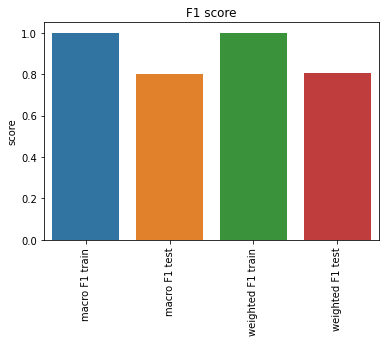

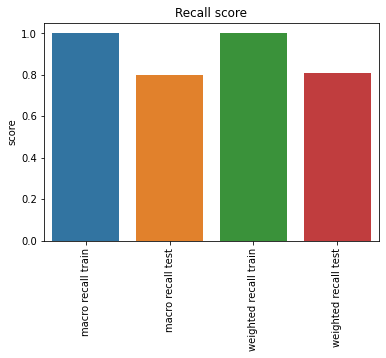

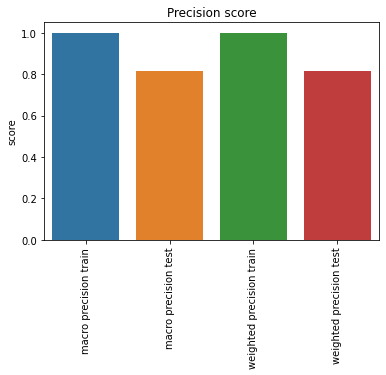

In [ ]:
#Simple
model_rf = RandomForestClassifier()
param_grid3 = [{'rf__n_estimators': [10, 50, 100, 200, 500, 1000],
                'rf__criterion': ['gini', 'entropy'],
                'rf__class_weight' : ['balanced', 'balanced_subsample']
                }]
pipe_rf_simple = Pipeline([('std', StandardScaler()),('rf', model_rf)])
grid_rf = GridSearchCV(estimator = pipe_rf_simple, param_grid = param_grid3, scoring = 'f1_weighted', cv = 5)
grid_rf.fit(x_train, y_train)


best_model_rf= grid_rf.best_estimator_

train_f1_rf, test_f1_rf, train_recall_rf, test_recall_rf, train_precision_rf, test_precision_rf, train_f1_weighted_rf, test_f1_weighted_rf,train_recall_weighted_rf, test_recall_weighted_rf, train_precision_weighted_rf, test_precision_weighted_rf, specifity_rf= calculate_metrics(best_model_rf, y_train, y_test, grid_rf)


Izracunate metrike: 


F1 78.42% (average over k-fold CV test folds)
Best Parameters: {'rf__class_weight': 'balanced_subsample', 'rf__criterion': 'entropy', 'rf__n_estimators': 500}
----------------------------------------------------------------------------------------------------
Macro: 
Training F1: 100.00%
Test F1: 76.99%


Training recall score: 100.00%
Test recall score: 76.91%


Training precision score: 100.00%
Test precision score: 77.08%
----------------------------------------------------------------------------------------------------


Weighted: 
Training F1: 100.00%
Test F1: 77.35%
Training recall score: 100.00%
Test recall score: 77.38%


Training precision score: 100.00%
Test precision score: 77.33%
----------------------------------------------------------------------------------------------------


Matrica konfuzije test: 


    0   1
0  27  10
1   9  38
----------------------------------------------------------------------------------------------------




Matrica ko

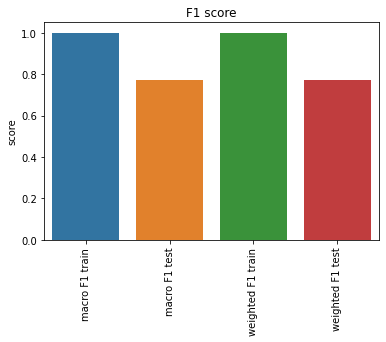

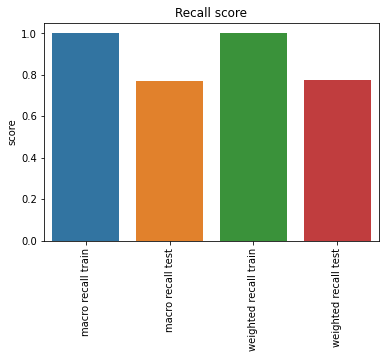

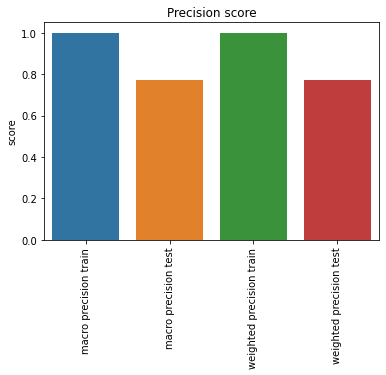

In [ ]:
# Select from model

pipe_rf_sfm = Pipeline([('std', StandardScaler()),('feature_selector',SelectFromModel(LinearSVC(penalty="l2",dual=False))),('rf', model_rf)])


grid_sfm_rf = GridSearchCV(estimator = pipe_rf_sfm, param_grid = param_grid3, scoring = 'f1_weighted', cv = 5)
grid_sfm_rf.fit(x_train_validation, y_train_validation)

best_model_rf_sfm = grid_sfm_rf.best_estimator_

train_f1_rf_sfm, test_f1_rf_sfm, train_recall_rf_sfm, test_recall_rf_sfm, train_precision_rf_sfm, test_precision_rf_sfm, train_f1_weighted_rf_sfm, test_f1_weighted_rf_sfm,train_recall_weighted_rf_sfm, test_recall_weighted_rf_sfm, train_precision_weighted_rf_sfm, test_precision_weighted_rf_sfm, specifity_rf_sfm= calculate_metrics(best_model_rf_sfm, y_train, y_test, grid_sfm_rf)



Izracunate metrike: 


F1 76.16% (average over k-fold CV test folds)
Best Parameters: {'rf__class_weight': 'balanced', 'rf__criterion': 'entropy', 'rf__n_estimators': 100}
----------------------------------------------------------------------------------------------------
Macro: 
Training F1: 100.00%
Test F1: 72.82%


Training recall score: 100.00%
Test recall score: 72.57%


Training precision score: 100.00%
Test precision score: 73.89%
----------------------------------------------------------------------------------------------------


Weighted: 
Training F1: 100.00%
Test F1: 73.44%
Training recall score: 100.00%
Test recall score: 73.81%


Training precision score: 100.00%
Test precision score: 73.85%
----------------------------------------------------------------------------------------------------


Matrica konfuzije test: 


    0   1
0  23  14
1   8  39
----------------------------------------------------------------------------------------------------




Matrica konfuzije tr

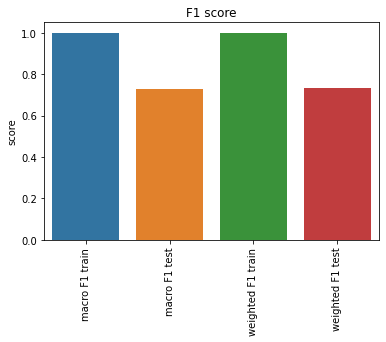

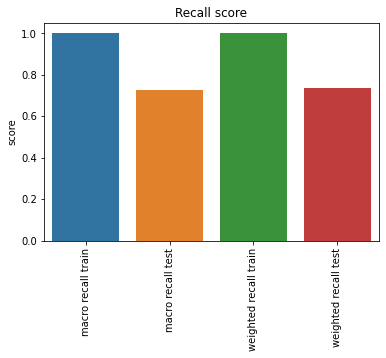

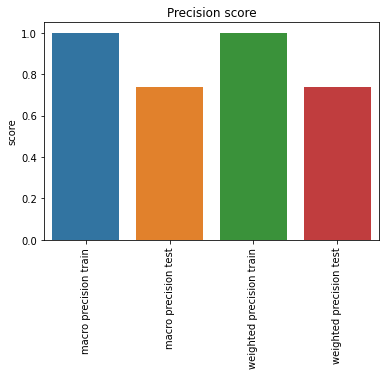

In [ ]:
# RFECV
pipe_rf_rfecv = Pipeline([('std', StandardScaler()),('feature_selector',RFECV(estimator = SVC(kernel = 'linear'),step =1, cv =5)),('rf', model_rf)])
grid_rfecv_rf = GridSearchCV(estimator = pipe_rf_rfecv, param_grid = param_grid3, scoring = 'f1_weighted', cv = 5)
grid_rfecv_rf.fit(x_train_validation, y_train_validation)

best_model_rf_rfecv = grid_rfecv_rf.best_estimator_

train_f1_rf_rfecv, test_f1_rf_rfecv, train_recall_rf_rfecv, test_recall_rf_rfecv, train_precision_rf_rfecv, test_precision_rf_rfecv, train_f1_weighted_rf_rfecv, test_f1_weighted_rf_rfecv,train_recall_weighted_rf_rfecv, test_recall_weighted_rf_rfecv, train_precision_weighted_rf_rfecv, test_precision_weighted_rf_rfecv, specifity_rf_rfecv= calculate_metrics(best_model_rf_rfecv, y_train, y_test, grid_rfecv_rf)



Izracunate metrike: 


F1 82.60% (average over k-fold CV test folds)
Best Parameters: {'rf__class_weight': 'balanced_subsample', 'rf__criterion': 'gini', 'rf__n_estimators': 500}
----------------------------------------------------------------------------------------------------
Macro: 
Training F1: 100.00%
Test F1: 81.94%


Training recall score: 100.00%
Test recall score: 82.03%


Training precision score: 100.00%
Test precision score: 81.86%
----------------------------------------------------------------------------------------------------


Weighted: 
Training F1: 100.00%
Test F1: 82.17%
Training recall score: 100.00%
Test recall score: 82.14%


Training precision score: 100.00%
Test precision score: 82.21%
----------------------------------------------------------------------------------------------------


Matrica konfuzije test: 


    0   1
0  30   7
1   8  39
----------------------------------------------------------------------------------------------------




Matrica konfu

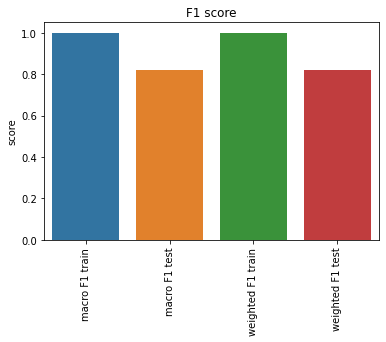

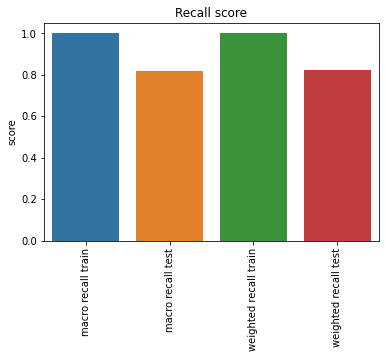

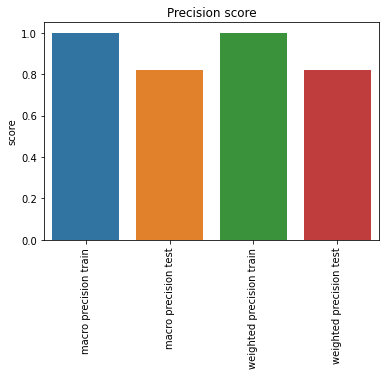

In [ ]:
# Select from model tree based algorithm

pipe_rf_sfm_tree = Pipeline([('std', StandardScaler()),('feature_selector',SelectFromModel(RandomForestClassifier(max_depth= 12, n_estimators= 50))),('rf', model_rf)])


grid_rf_sfm_tree = GridSearchCV(estimator = pipe_rf_sfm_tree, param_grid = param_grid3, scoring = 'f1_weighted', cv = 5)
grid_rf_sfm_tree.fit(x_train_validation, y_train_validation)

best_model_rf_sfm_tree = grid_rf_sfm_tree.best_estimator_

train_f1_rf_sfm_tree, test_f1_rf_sfm_tree, train_recall_rf_sfm_tree, test_recall_rf_sfm_tree, train_precision_rf_sfm_tree, test_precision_rf_sfm_tree, train_f1_weighted_rf_sfm_tree, test_f1_weighted_rf_sfm_tree,train_recall_weighted_rf_sfm_tree,test_recall_weighted_rf_sfm_tree, train_precision_rf_sfm_tree, test_precision_weighted_rf_sfm_tree , specifity_rf_sfm_tree= calculate_metrics(best_model_rf_sfm_tree, y_train, y_test, grid_rf_sfm_tree)



Izracunate metrike: 


F1 73.99% (average over k-fold CV test folds)
Best Parameters: {'rf__class_weight': 'balanced_subsample', 'rf__criterion': 'entropy', 'rf__n_estimators': 100}
----------------------------------------------------------------------------------------------------
Macro: 
Training F1: 100.00%
Test F1: 73.06%


Training recall score: 100.00%
Test recall score: 72.86%


Training precision score: 100.00%
Test precision score: 73.62%
----------------------------------------------------------------------------------------------------


Weighted: 
Training F1: 100.00%
Test F1: 73.60%
Training recall score: 100.00%
Test recall score: 73.81%


Training precision score: 100.00%
Test precision score: 73.72%
----------------------------------------------------------------------------------------------------


Matrica konfuzije test: 


    0   1
0  24  13
1   9  38
----------------------------------------------------------------------------------------------------




Matrica ko

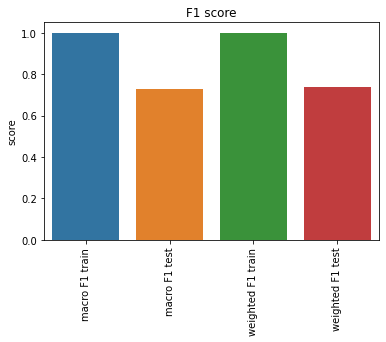

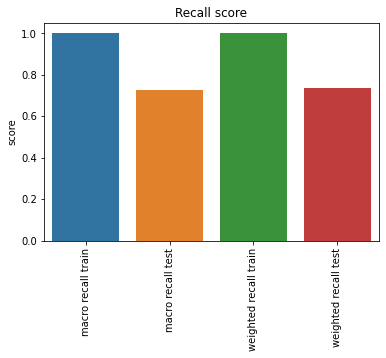

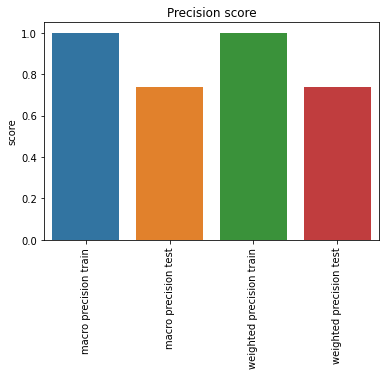

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline

pipe_rf_smote = Pipeline([('std', StandardScaler()),('feature_selector',RFECV(estimator = SVC(kernel = 'linear'),step =1, cv =5)),('Oversampling',SMOTE(k_neighbors=4)),('rf', model_rf)])
grid_rf_smote = GridSearchCV(estimator = pipe_rf_smote, param_grid = param_grid3, scoring = 'f1_weighted', cv = 5)
grid_rf_smote.fit(x_train_validation, y_train_validation)

best_model_rf_smote = grid_rf_smote.best_estimator_

train_f1_rf_smote, test_f1_rf_smote, train_recall_rf_smote, test_recall_rf_smote, train_precision_rf_smote, test_precision_rf_smote, train_f1_weighted_rf_smote, test_f1_weighted_rf_smote,train_recall_weighted_rf_smote,test_recall_weighted_rf_smote, train_precision_weighted_rf_smote, test_precision_weighted_rf_smote, specifity_rf_smote= calculate_metrics(best_model_rf_smote, y_train, y_test, grid_rf_smote)




In [ ]:
cross_val_rf_smote =nested_cross_val(param_grid3,pipe_rf_smote, 'rf_smote')

-------------------------------------------------- 

Algorithm: rf_smote

rf_smote - Prosecno 71.73% +/- 5.06


In [ ]:

cross_val_rf_rfecv =nested_cross_val(param_grid3,pipe_rf_rfecv, 'rf_rfecv')

-------------------------------------------------- 

Algorithm: rf_rfecv

rf_rfecv - Prosecno 74.12% +/- 3.20


## Stabla odlucivanja

Izracunate metrike: 


F1 73.65% (average over k-fold CV test folds)
Best Parameters: {'tree__class_weight': 'balanced', 'tree__criterion': 'entropy', 'tree__max_depth': 6, 'tree__splitter': 'best'}
----------------------------------------------------------------------------------------------------
Macro: 
Training F1: 91.82%
Test F1: 77.12%


Training recall score: 91.05%
Test recall score: 77.20%


Training precision score: 93.64%
Test precision score: 77.06%
----------------------------------------------------------------------------------------------------


Weighted: 
Training F1: 92.05%
Test F1: 77.41%
Training recall score: 92.16%
Test recall score: 77.38%


Training precision score: 92.92%
Test precision score: 77.46%
----------------------------------------------------------------------------------------------------


Matrica konfuzije test: 


    0   1
0  28   9
1  10  37
----------------------------------------------------------------------------------------------------





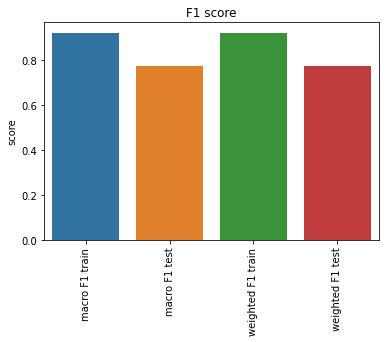

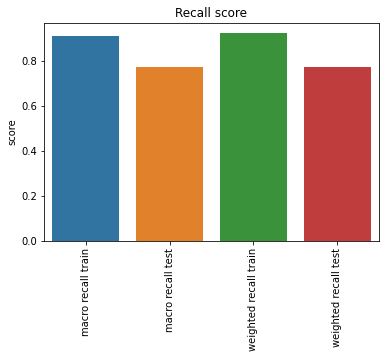

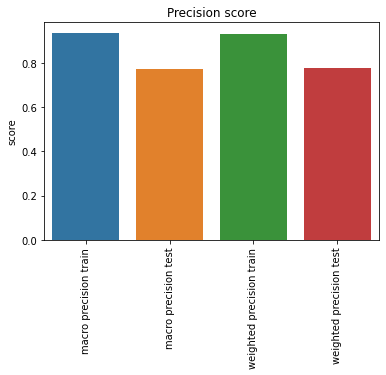

In [ ]:
model_tree = DecisionTreeClassifier()
param_grid4 = [{'tree__max_depth': list(range(1, 10)),
                'tree__criterion': ['gini', 'entropy'],
                'tree__splitter' : ['best', 'random'],
                'tree__class_weight' : ['balanced']
                }]

pipe_tree_simple = Pipeline([('std', StandardScaler()),('tree', model_tree)])
grid_tree = GridSearchCV(estimator = pipe_tree_simple, param_grid = param_grid4, scoring = 'f1_weighted', cv = 5)
grid_tree.fit(x_train_validation, y_train_validation)


best_model_tree= grid_tree.best_estimator_

train_f1_tree, test_f1_tree, train_recall_tree, test_recall_tree, train_precision_tree, test_precision_tree, train_f1_weighted_tree, test_f1_weighted_tree, train_recall_weighted_tree,test_recall_weighted_tree, train_precision_tree, test_precision_weighted_tree, specifity_tree = calculate_metrics(best_model_tree, y_train,y_test,grid_tree)


In [ ]:
model_tree = DecisionTreeClassifier(criterion ='gini', max_depth = 9, splitter = 'random', class_weight = 'balanced')
model_tree_plot = model_tree.fit(x_train_validation, y_train_validation)
plt.figure(figsize=(200, 100))
tree.plot_tree(model_tree, feature_names=list(x.columns), fontsize=12, filled=True, rounded=True)


plt.show()

Izracunate metrike: 


F1 73.07% (average over k-fold CV test folds)
Best Parameters: {'tree__class_weight': 'balanced', 'tree__criterion': 'entropy', 'tree__max_depth': 8, 'tree__splitter': 'best'}
----------------------------------------------------------------------------------------------------
Macro: 
Training F1: 93.80%
Test F1: 61.88%


Training recall score: 93.10%
Test recall score: 61.85%


Training precision score: 95.24%
Test precision score: 62.38%
----------------------------------------------------------------------------------------------------


Weighted: 
Training F1: 93.96%
Test F1: 62.69%
Training recall score: 94.03%
Test recall score: 63.10%


Training precision score: 94.60%
Test precision score: 62.74%
----------------------------------------------------------------------------------------------------


Matrica konfuzije test: 


    0   1
0  19  18
1  13  34
----------------------------------------------------------------------------------------------------





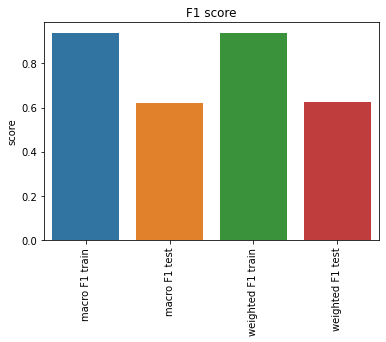

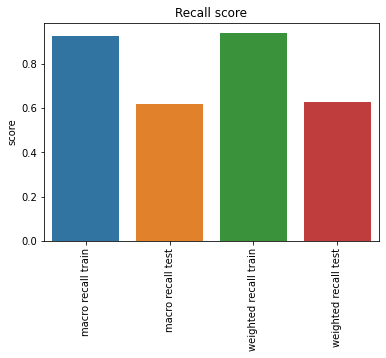

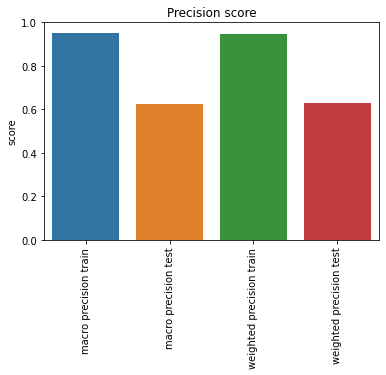

In [ ]:

pipe_tree_sfm = Pipeline([('std', StandardScaler()),('feature_selector',SelectFromModel(LinearSVC(penalty="l2",dual=False))),('tree', model_tree)])


grid_sfm_tree = GridSearchCV(estimator = pipe_tree_sfm, param_grid = param_grid4, scoring = 'f1_weighted', cv = 5)
grid_sfm_tree.fit(x_train_validation, y_train_validation)

best_model_sfm_tree = grid_sfm_tree.best_estimator_
train_f1_tree_sfm, test_f1_tree_sfm, train_recall_tree_sfm, test_recall_tree_sfm, train_precision_tree_sfm, test_precision_tree_sfm, train_f1_weighted_tree_sfm, test_f1_weighted_tree_sfm, train_recall_weighted_tree_sfm,test_recall_weighted_tree_sfm, train_precision_weighted_tree_sfm, test_precision_weighted_tree_sfm, specifity_tree_sfm = calculate_metrics(best_model_sfm_tree, y_train, y_test, grid_sfm_tree)



Izracunate metrike: 


F1 68.83% (average over k-fold CV test folds)
Best Parameters: {'tree__class_weight': 'balanced', 'tree__criterion': 'gini', 'tree__max_depth': 7, 'tree__splitter': 'random'}
----------------------------------------------------------------------------------------------------
Macro: 
Training F1: 76.00%
Test F1: 75.04%


Training recall score: 75.49%
Test recall score: 74.70%


Training precision score: 81.05%
Test precision score: 76.93%
----------------------------------------------------------------------------------------------------


Weighted: 
Training F1: 76.93%
Test F1: 75.68%
Training recall score: 77.99%
Test recall score: 76.19%


Training precision score: 80.11%
Test precision score: 76.64%
----------------------------------------------------------------------------------------------------


Matrica konfuzije test: 


    0   1
0  23  14
1   6  41
----------------------------------------------------------------------------------------------------






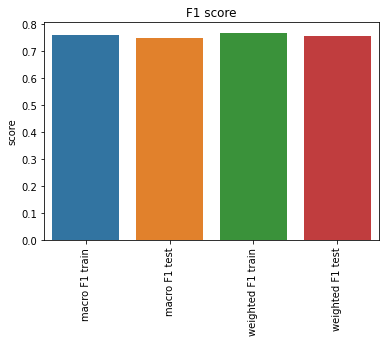

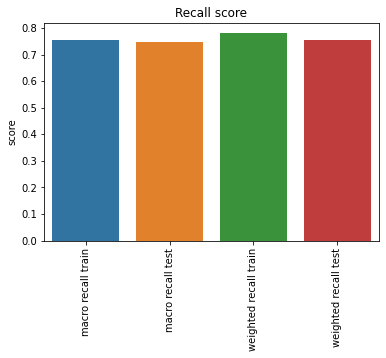

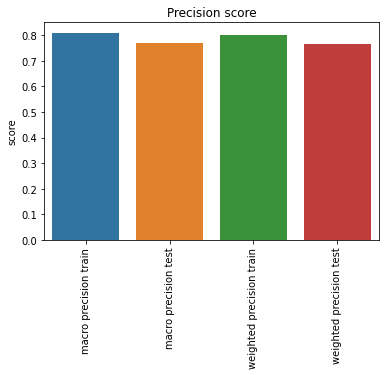

In [ ]:
# RFECV
pipe_tree_rfecv = Pipeline([('std', StandardScaler()),('feature_selector',RFECV(estimator = SVC(kernel = 'linear'),step =1, cv =5)),('tree', model_tree)])
grid_rfecv_tree = GridSearchCV(estimator = pipe_tree_rfecv, param_grid = param_grid4, scoring = 'f1_weighted', cv = 5)
grid_rfecv_tree.fit(x_train_validation, y_train_validation)

from sklearn.metrics import f1_score
best_model_tree_rfecv = grid_rfecv_tree.best_estimator_

train_f1_tree_rfecv, test_f1_tree_rfecv, train_recall_tree_rfecv, test_recall_tree_rfecv, train_precision_tree_rfecv, test_precision_tree_rfecv, train_f1_weighted_tree_rfecv, test_f1_weighted_tree_rfecv, train_recall_weighted_tree_rfecv, test_recall_weighted_tree_rfecv,train_precision_weighted_tree_rfecv, test_precision_weighted_tree_rfecv, specifity_tree_rfecv = calculate_metrics(best_model_tree_rfecv, y_train, y_test, grid_rfecv_tree)



Izracunate metrike: 


F1 75.92% (average over k-fold CV test folds)
Best Parameters: {'tree__class_weight': 'balanced', 'tree__criterion': 'entropy', 'tree__max_depth': 6, 'tree__splitter': 'best'}
----------------------------------------------------------------------------------------------------
Macro: 
Training F1: 90.32%
Test F1: 73.75%


Training recall score: 89.73%
Test recall score: 74.30%


Training precision score: 91.54%
Test precision score: 73.96%
----------------------------------------------------------------------------------------------------


Weighted: 
Training F1: 90.57%
Test F1: 73.90%
Training recall score: 90.67%
Test recall score: 73.81%


Training precision score: 91.06%
Test precision score: 74.74%
----------------------------------------------------------------------------------------------------


Matrica konfuzije test: 


    0   1
0  29   8
1  14  33
----------------------------------------------------------------------------------------------------





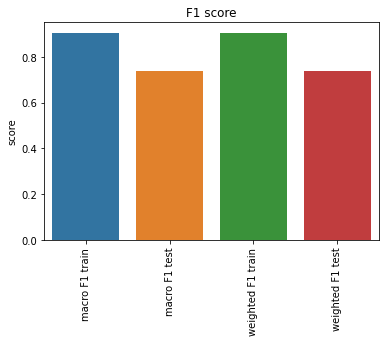

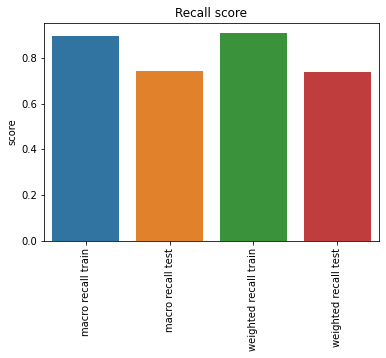

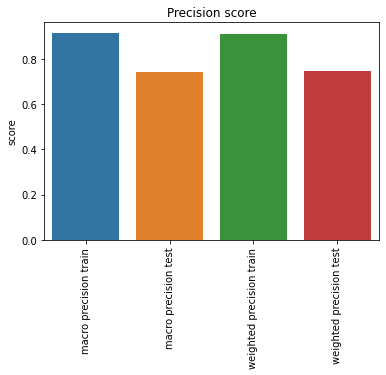

In [ ]:
# Select from model tree based algorithm

pipe_tree_sfm_tree = Pipeline([('std', StandardScaler()),('feature_selector',SelectFromModel(RandomForestClassifier(max_depth= 12, n_estimators= 50))),('tree', model_tree)])


grid_rf_sfm_tree = GridSearchCV(estimator = pipe_tree_sfm_tree, param_grid = param_grid4, scoring = 'f1_weighted', cv = 5)
grid_rf_sfm_tree.fit(x_train_validation, y_train_validation)

best_model_rf_sfm_tree = grid_rf_sfm_tree.best_estimator_
train_f1_rf_sfm_tree, test_f1_rf_sfm_tree, train_recall_rf_sfm_tree, test_recall_rf_sfm_tree, train_precision_rf_sfm_tree, test_precision_rf_sfm_tree, train_f1_weighted_rf_sfm_tree, test_f1_weighted_rf_sfm_tree, train_recall_weighted_rf_sfm_tree,test_recall_weighted_rf_sfm_tree, train_precision_weighted_rf_sfm_tree, test_precision_weighted_rf_sfm_tree, specifity_rf_sfm_tree = calculate_metrics(best_model_rf_sfm_tree, y_train, y_test, grid_rf_sfm_tree)



Izracunate metrike: 


F1 66.78% (average over k-fold CV test folds)
Best Parameters: {'tree__class_weight': 'balanced', 'tree__criterion': 'entropy', 'tree__max_depth': 7, 'tree__splitter': 'random'}
----------------------------------------------------------------------------------------------------
Macro: 
Training F1: 73.31%
Test F1: 67.88%


Training recall score: 73.00%
Test recall score: 67.74%


Training precision score: 79.00%
Test precision score: 68.78%
----------------------------------------------------------------------------------------------------


Weighted: 
Training F1: 74.39%
Test F1: 68.61%
Training recall score: 75.75%
Test recall score: 69.05%


Training precision score: 78.07%
Test precision score: 68.90%
----------------------------------------------------------------------------------------------------


Matrica konfuzije test: 


    0   1
0  21  16
1  10  37
----------------------------------------------------------------------------------------------------



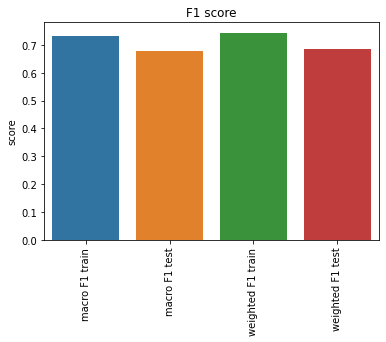

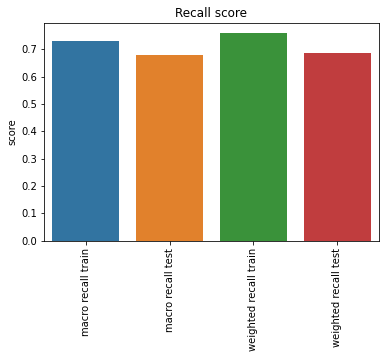

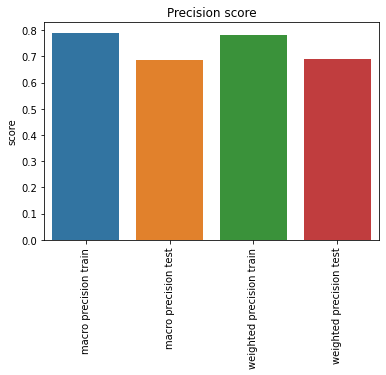

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline

pipe_tree_smote = Pipeline([('std', StandardScaler()),('feature_selector',RFECV(estimator = SVC(kernel = 'linear'),step =1, cv =5)),('Oversampling',SMOTE(k_neighbors=4)),('tree', model_tree)])
grid_tree_smote = GridSearchCV(estimator = pipe_tree_smote, param_grid = param_grid4, scoring = 'f1_weighted', cv = 5)
grid_tree_smote.fit(x_train_validation, y_train_validation)

best_model_tree_smote = grid_tree_smote.best_estimator_

train_f1_tree_smote, test_f1_tree_smote, train_recall_tree_smote, test_recall_tree_smote, train_precision_tree_smote, test_precision_tree_smote, train_f1_weighted_tree_smote, test_f1_weighted_tree_smote, test_recall_weighted_tree_smote,train_recall_weighted_tree_smote, train_precision_tree_smote, test_precision_tree_smote, specifity_tree_smote= calculate_metrics(best_model_tree_smote, y_train, y_test, grid_tree_smote)


In [ ]:
nested_cross_val(param_grid4,pipe_tree_smote, 'tree_smote')

-------------------------------------------------- 

Algorithm: tree

tree - Prosecno 63.08% +/- 2.56


0.6308165057067604

In [ ]:

nested_cross_val(param_grid4,pipe_tree_sfm, 'tree_sfm')

-------------------------------------------------- 

Algorithm: tree

tree - Prosecno 63.97% +/- 4.27


0.6397278314310799

In [ ]:
grid_rfecv_tree

nested_cross_val(param_grid4,grid_rfecv_tree, 'tree_rfecv')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


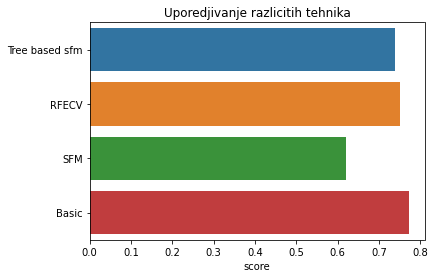

In [ ]:
compare_metrics(test_f1_rf_sfm_tree,test_f1_tree_rfecv,test_f1_tree_sfm,test_f1_tree, 'Tree based sfm', 'RFECV', 'SFM', 'Basic')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


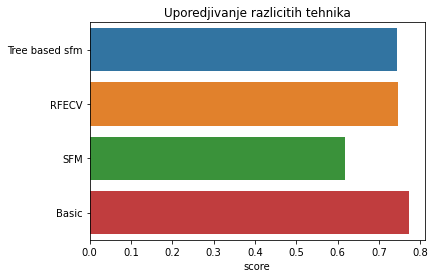

In [ ]:
compare_metrics(test_recall_rf_sfm_tree,test_recall_tree_rfecv,test_recall_tree_sfm,test_recall_tree, 'Tree based sfm', 'RFECV', 'SFM', 'Basic')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


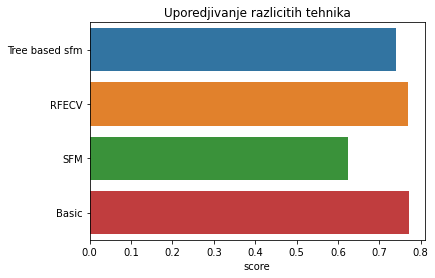

In [ ]:
compare_metrics(test_precision_rf_sfm_tree,test_precision_tree_rfecv,test_precision_tree_sfm,test_precision_tree, 'Tree based sfm', 'RFECV', 'SFM', 'Basic')

#### Weighted

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


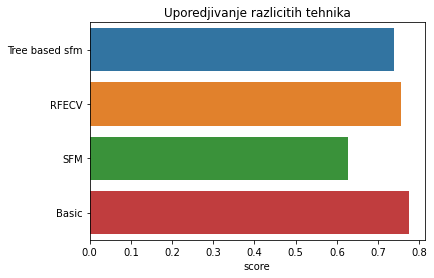

In [ ]:
compare_metrics(test_f1_weighted_rf_sfm_tree, test_f1_weighted_tree_rfecv, test_f1_weighted_tree_sfm, test_f1_weighted_tree, 'Tree based sfm', 'RFECV', 'SFM', 'Basic')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


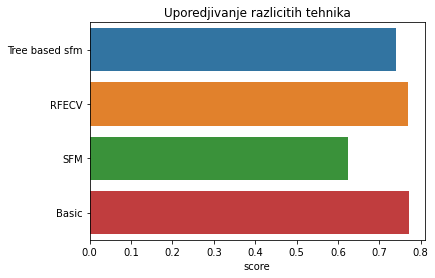

In [ ]:
compare_metrics(test_precision_weighted_rf_sfm_tree, test_precision_weighted_tree_rfecv, test_precision_weighted_tree_sfm
,test_precision_weighted_tree, 'Tree based sfm', 'RFECV', 'SFM', 'Basic')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


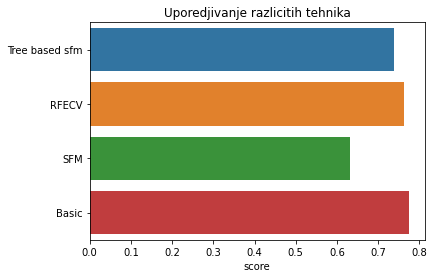

In [ ]:
compare_metrics(test_recall_weighted_rf_sfm_tree,test_recall_weighted_tree_rfecv,test_recall_weighted_tree_sfm,test_recall_weighted_tree, 'Tree based sfm', 'RFECV', 'SFM', 'Basic')




Kako je doslo do overfittinga kod RF i kod normalnog obucavanja, izabrala sam sledeci model (Stabla odlucivanja) koji mi je davao najbolje metrike i gde je bila najmanja razlika izmedju rezultata dobijenih na trening i test skupu

In [ ]:
e